<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  EDA & Questions
</div>

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
cleaned_df = pd.read_csv('../data/processed_data.csv')
cleaned_df.head(10)

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
0,HumanitZ,"Action, Adventure, RPG, Early Access",0.0,0.0,Yodubzz Studios,Freedom Games,"English, French, German, Spanish - Spain, Japa...",1581.0,2081.0,500.0,260000.0,0.20,208000.0,2023,9,18,0.733696
1,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",1.0,0.0,Cassel Games,Cassel Games,"English, Korean, Japanese, Simplified Chinese,...",1602.0,1807.0,205.0,260000.0,0.10,234000.0,2023,11,5,0.846123
2,Void Crew,"Action, Adventure, Early Access",0.0,0.0,Hutlihut Games,Focus Entertainment,"English, French, German, Spanish - Spain, Poli...",2071.0,2280.0,209.0,286000.0,0.20,228800.0,2023,9,7,0.868512
3,Bread & Fred,"Action, Adventure, Casual, Indie",1.0,0.0,SandCastles Studio,Apogee Entertainment,"English, Spanish - Spain, Catalan, French, Ita...",2332.0,2644.0,312.0,205000.0,0.25,153750.0,2023,5,23,0.846368
4,Mind Over Magic,"Simulation, Early Access",0.0,0.0,Sparkypants,Klei Publishing,"English, Simplified Chinese",583.0,632.0,49.0,220000.0,0.10,198000.0,2023,12,14,0.861866
5,Cobalt Core,"Indie, Strategy",1.0,0.0,Rocket Rat Games,Brace Yourself Games,"English, French, German, Spanish - Spain, Japa...",1333.0,1367.0,34.0,260000.0,0.20,208000.0,2023,11,8,0.921083
6,Cuisineer,"Action, Adventure, Casual, Indie, RPG, Simulation",1.0,0.0,BattleBrew Productions,Marvelous Europe,"English, French, German, Spanish - Spain, Japa...",837.0,1069.0,232.0,321000.0,0.20,256800.0,2023,11,9,0.748316
7,Wizard with a Gun,"Action, Adventure, Indie",1.0,0.0,Galvanic Games,Devolver Digital,"English, French, German, Spanish - Spain, Japa...",1481.0,1773.0,292.0,321000.0,0.20,256800.0,2023,10,17,0.800037
8,Class of '09: The Re-Up,"Casual, Indie, RPG, Simulation",0.0,1.0,SBN3,SBN3,English,1151.0,1162.0,11.0,205000.0,0.10,184500.0,2023,6,1,0.931942
9,Thief Simulator 2,"Action, Indie, Simulation",0.0,0.0,CookieDev,PlayWay S.A.,"English, French, Italian, German, Spanish - Sp...",2387.0,2608.0,221.0,260000.0,0.15,221000.0,2023,10,4,0.876369


# Kiểm tra tính tương quan của dữ liệu (Correlation)

Kiểm tra tính tương quan dữ liệu giúp ta tìm được các mối quan hệ trong dữ liệu để lọc ra những feature phù hợp cho mô hình dự đoán.

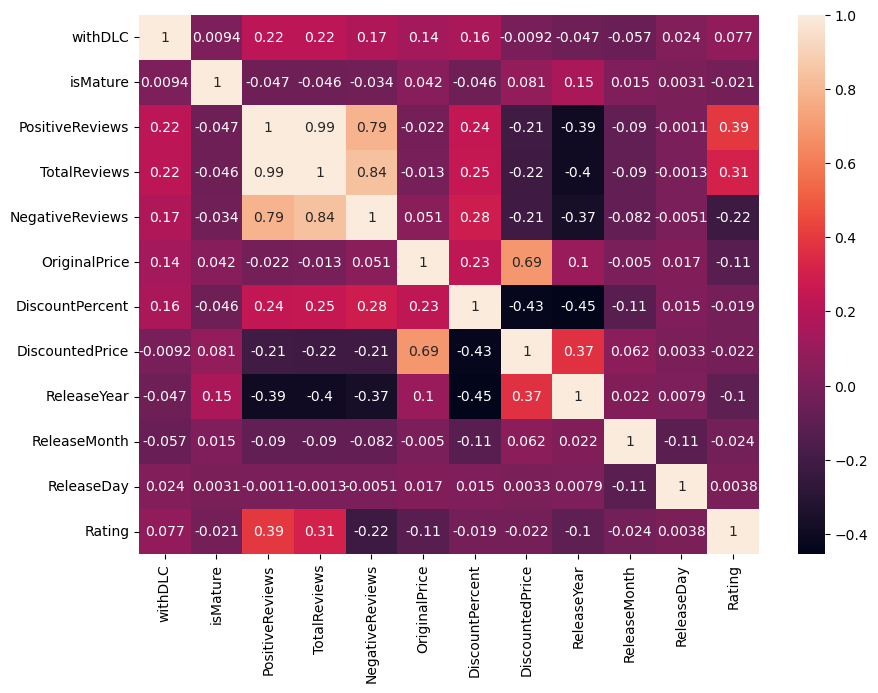

In [6]:
df_copy = cleaned_df.copy()

# calculate correlation matrix
corr_matrix = df_copy.corr(method='spearman', numeric_only=True)

# plot heatmap graph
plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()


Ta thấy những nơi có tương quan mạnh (cả dương và âm) thường tập trung ở những cột ta đã xét giá trị ngoại lai ở phần **Preprocessing**.
Giờ ta sẽ kiểm tra xem các giá trị này có quan hệ như thế nào.

e:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype 

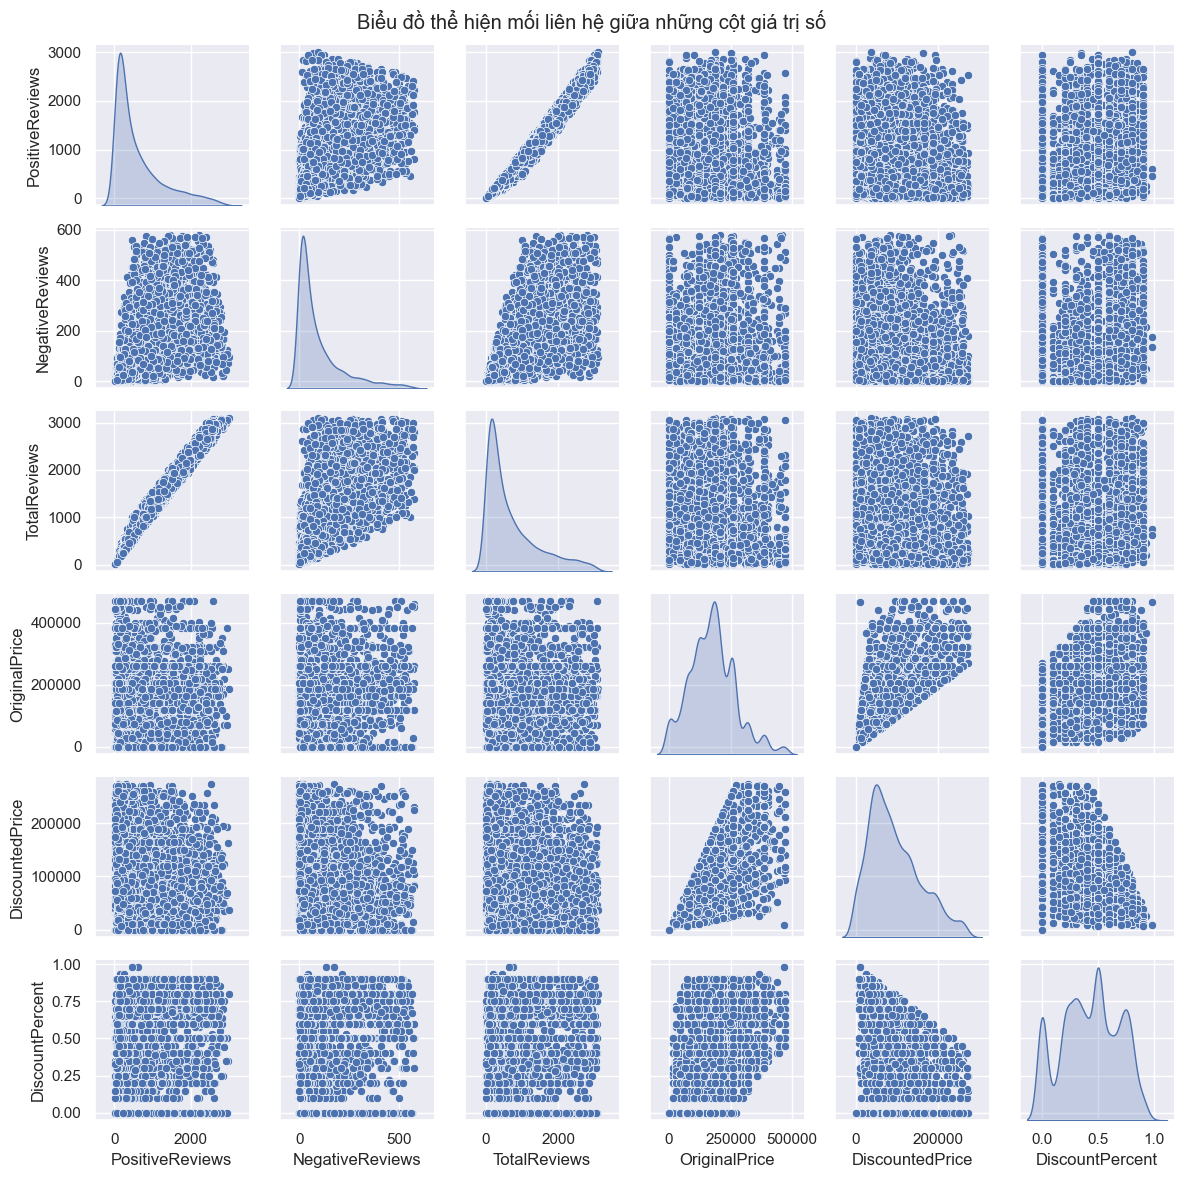

In [7]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']
sns.set()
cols = numeric_cols
sns.pairplot(cleaned_df[cols], size = 2 ,kind ='scatter',diag_kind='kde')
plt.suptitle('Biểu đồ thể hiện mối liên hệ giữa những cột giá trị số')
plt.tight_layout()
plt.show()

Các thuộc tính `Reviews` khi xét với `Price` rất hỗn loạn, có nghĩa là Price không có mối tương quan mạnh tới các thuộc tính này -> Giá tiền của game không ảnh hưởng đến đánh giá của người dùng.

**`PositiveReviews` và `NegativeReviews` tăng giảm như nào dựa vào số lượng `TotalReviews`?**

e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0.98, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews')

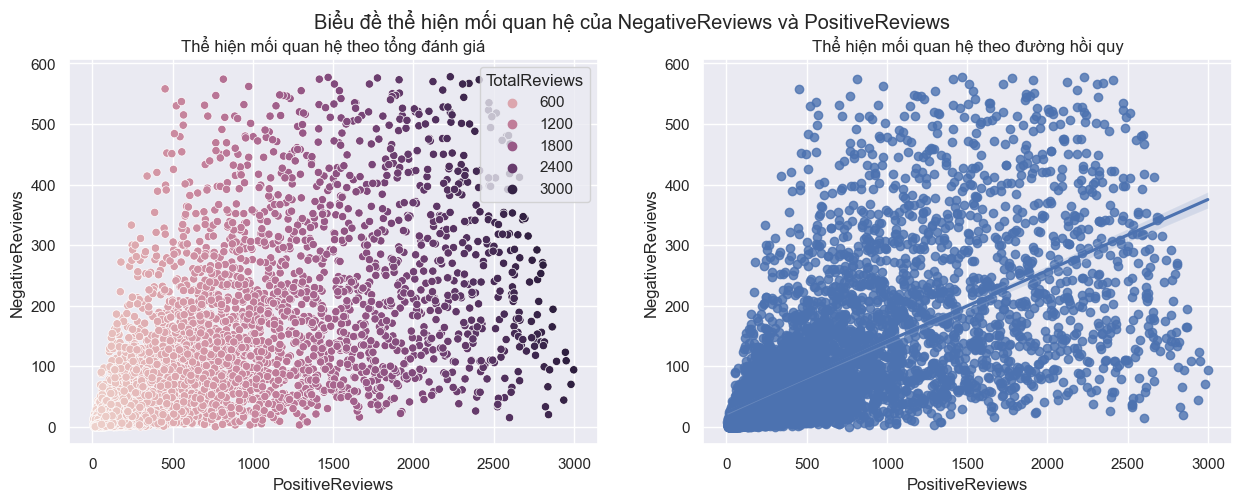

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x=cleaned_df['PositiveReviews'], y=cleaned_df['NegativeReviews'], hue=cleaned_df['TotalReviews'], ax=axs[0])
sns.regplot(x=cleaned_df['PositiveReviews'], y=cleaned_df['NegativeReviews'], ax=axs[1])
axs[0].set_title('Thể hiện mối quan hệ theo tổng đánh giá')
axs[1].set_title('Thể hiện mối quan hệ theo đường hồi quy')
plt.suptitle('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews')

Khi `TotalReviews` ít thì các điểm dữ liệu giữa `NegativeReviews` và `PositiveRevies` nằm sát và chi chít lên nhau, chứng tỏ trong khoảng này nó có mối tương quan mạnh.\
Khi `TotalReviews` ngày càng lớn dần, thì khoảng cách các điểm dữ liệu ngày càng nằm rời rạc và cách xa đường hồi quy, lượng `PositiveReviews` ngày càng tăng trong khi `NegativeReviews` ngày càng giảm.

Ta thử kiếm tra xem mối quan hệ giữa `NegativeReviews` và `PositiveReviews` dựa vào `isMature` và `withDLC` như thế nào:

e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo isMature')

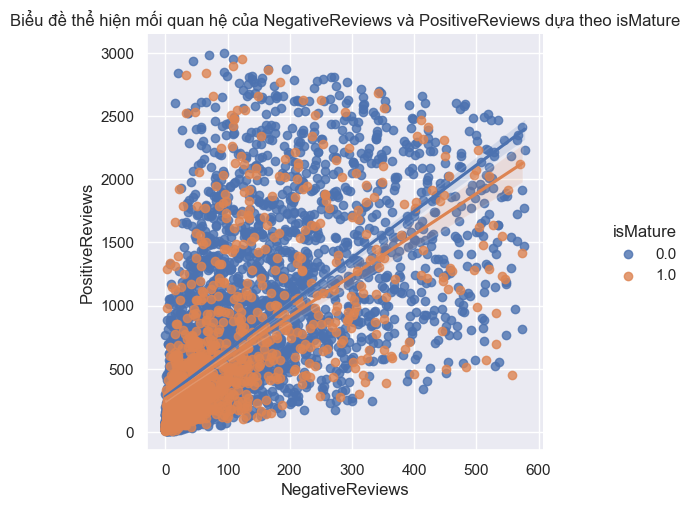

In [9]:
sns.lmplot(x="NegativeReviews", y="PositiveReviews", hue="isMature", data=cleaned_df)
plt.title('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo isMature')

e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo withDLC')

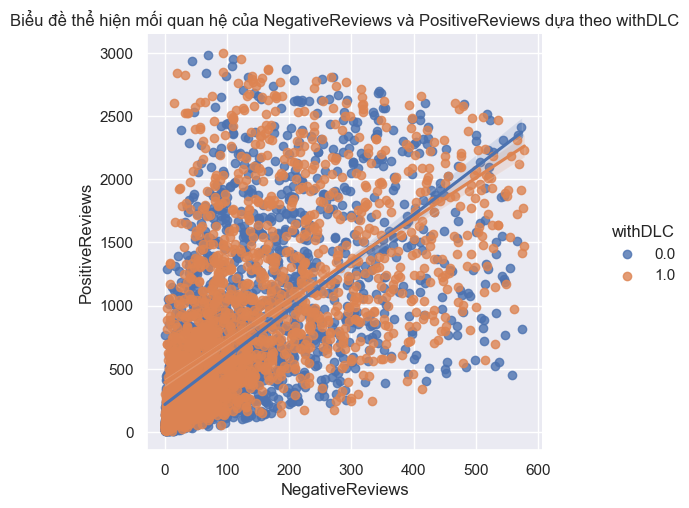

In [10]:
sns.lmplot(x="NegativeReviews", y="PositiveReviews", hue="withDLC", data=cleaned_df)
plt.title('Biểu đề thể hiện mối quan hệ của NegativeReviews và PositiveReviews dựa theo withDLC')

Ta thấy hai đường hồi quy phân loại theo `withDLC` và `isMature` trên mỗi hình sát nhau và gần như là một, do đó những game có **DLC** hay game có **Mature content** không ảnh hưởng quá nhiều khi người chơi đánh giá game.

##### Question 1: Câu hỏi đặt ra là đối với những game có downloadable content (withDLC) thì giá tiền gốc cần để mua game đó có nhiều hơn những game không kèm theo downloadable content hay không?

e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


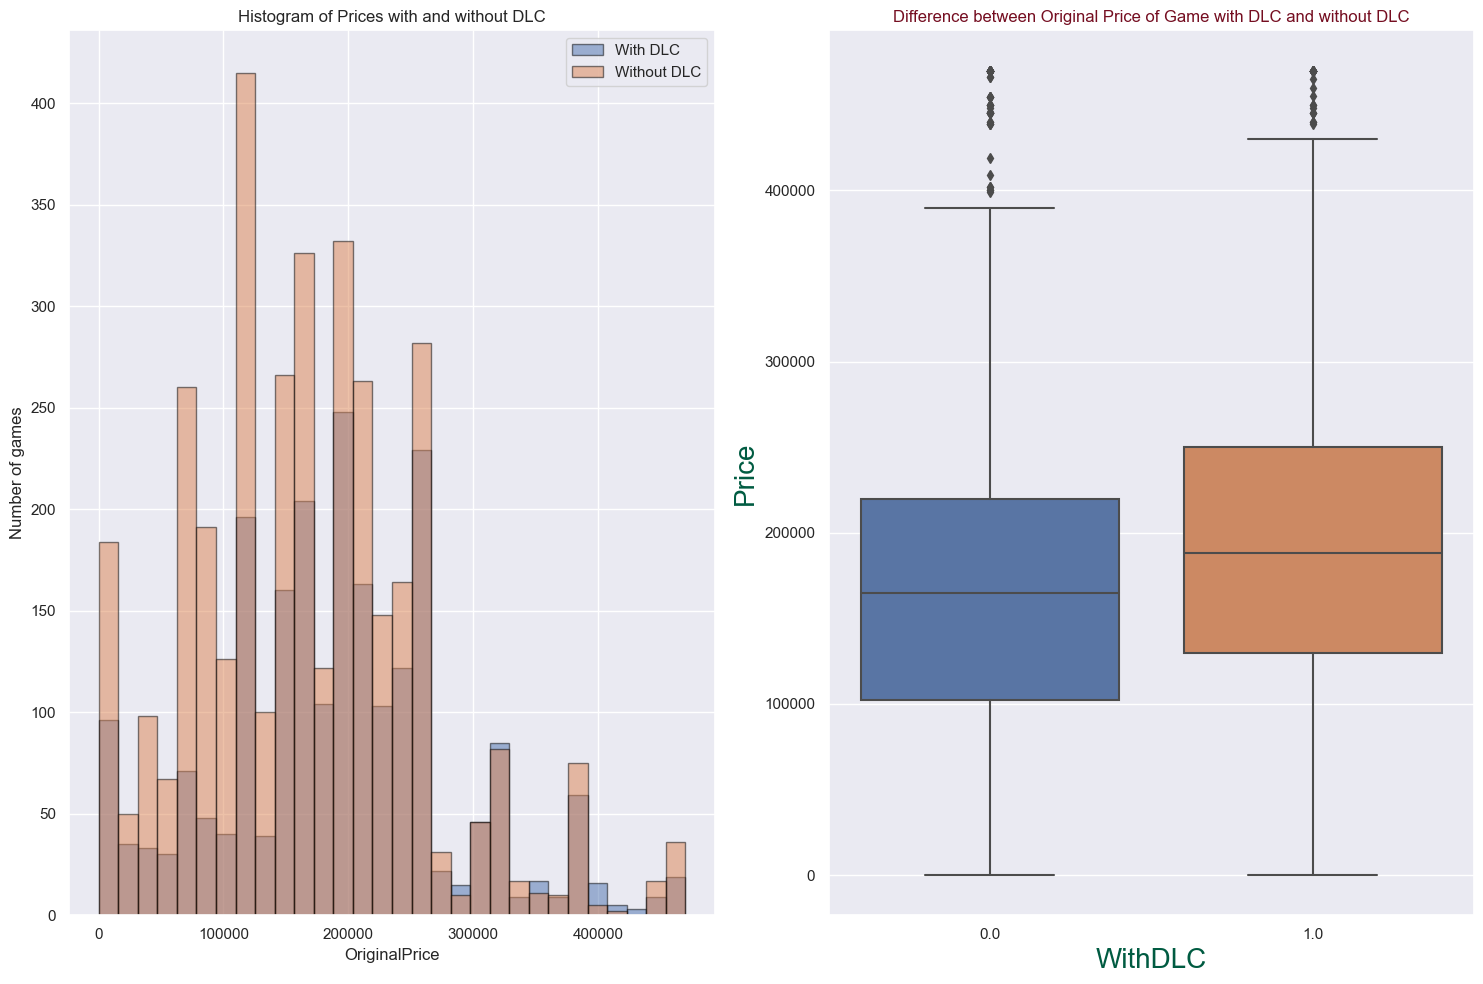

In [11]:
df_with_dlc = cleaned_df[cleaned_df['withDLC'] == 1]
df_without_dlc = cleaned_df[cleaned_df['withDLC'] == 0]

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].hist(df_with_dlc['OriginalPrice'], bins = 30, alpha = 0.5, label = 'With DLC', edgecolor = 'black')
axs[0].hist(df_without_dlc['OriginalPrice'], bins = 30, alpha = 0.5, label = 'Without DLC', edgecolor = 'black')
axs[0].legend(loc = 'upper right')
axs[0].set_title('Histogram of Prices with and without DLC')
axs[0].set_xlabel('OriginalPrice')
axs[0].set_ylabel('Number of games')

sns.boxplot(x = 'withDLC', y = 'OriginalPrice', data = cleaned_df, ax = axs[1])
axs[1].set_title('Difference between Original Price of Game with DLC and without DLC', color = '#750E21')
axs[1].set_xlabel('WithDLC', color = '#005B41', fontsize = 20)
axs[1].set_ylabel('Price', color = '#005B41', fontsize = 20)

plt.tight_layout()
plt.show()

In [12]:
print(df_with_dlc[['withDLC', 'OriginalPrice']].describe())
print(df_without_dlc[['withDLC', 'OriginalPrice']].describe())

       withDLC  OriginalPrice
count   2235.0    2235.000000
mean       1.0  189886.897069
std        0.0   92992.073927
min        1.0       0.000000
25%        1.0  130000.000000
50%        1.0  188000.000000
75%        1.0  250000.000000
max        1.0  470000.000000
       withDLC  OriginalPrice
count   3736.0    3736.000000
mean       0.0  165923.963089
std        0.0   91570.509965
min        0.0       0.000000
25%        0.0  102000.000000
50%        0.0  165000.000000
75%        0.0  220000.000000
max        0.0  470000.000000


e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 2000x1000 with 0 Axes>

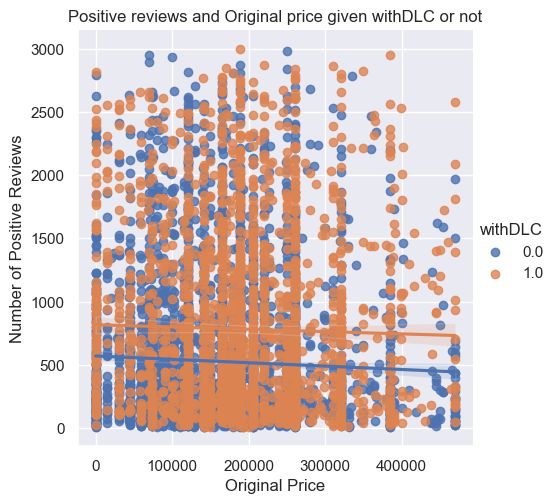

In [13]:
plt.figure(figsize = (20, 10))
sns.lmplot(x = 'OriginalPrice', y = 'PositiveReviews', hue = 'withDLC', data = cleaned_df)

plt.xlabel('Original Price')
plt.ylabel('Number of Positive Reviews')
plt.title('Positive reviews and Original price given withDLC or not')
plt.show()

##### Kết luận: Nhìn vào 2 biểu đồ boxplot và bảng dữ liệu trên, ta có thể thấy giá tiền gốc của game có kèm theo downloadable content có xu hướng cao hơn những game không có mặc dù game không có DLC có số lượng nhiều hơn cùng với sự không liên quan mật thiết gì giữa withDLC và PositiveReviews. Các nhà phát hành game có thể phát triển game cùng với downloadable content để có thể tăng giá thành sản phẩm với mục đích thu lợi nhuận cao hơn mà không ảnh hưởng tiêu cực đến đánh giá của người dùng về game

### Question 2: Mỗi thể loại game thường được giảm giá như thế nào?
Thông thường, ta hay cho rằng những sản phẩm giảm giá nhiều có nghĩa là những món đó đã cũ hoặc đã lỗi thời, thế còn game thì sao?

Việc mỗi thể loại game giảm giá nhiều hay ít có ảnh hưởng gì tới việc những thể loại game đó có đang là xu hướng trong thị trường game hiện tại hay không? Điều này có quyết định đến việc phát triển một game hay không?

Đầu tiên, ta lấy cột `Genre` và `DiscountPercent`

In [14]:
genre_df = cleaned_df[['Genre', 'DiscountPercent']]
genre_df

,Genre,DiscountPercent
0,"Action, Adventure, RPG, Early Access",0.20
1,"Adventure, Casual, Indie, Simulation, Strategy...",0.10
2,"Action, Adventure, Early Access",0.20
3,"Action, Adventure, Casual, Indie",0.25
4,"Simulation, Early Access",0.10
...,...,...
5966,"Adventure, Casual, Indie, Simulation",0.00
5967,"Adventure, Casual, Indie",0.90
5968,Action,0.70
5969,Action,0.00


Vì `Genre` là một cột đặc biệt, vì mỗi sample có thể có nhiều thể loại, do đó để thể hiện rõ những thể loại nào đang phát triển, ta sẽ chia `Genre` ra thành từng sample:

In [15]:
explode_genre_df = genre_df.assign(Genre=genre_df['Genre'].str.split(', ')).explode('Genre')
explode_genre_df = explode_genre_df.reset_index(drop=True)
explode_genre_df

,Genre,DiscountPercent
0,Action,0.2
1,Adventure,0.2
2,RPG,0.2
3,Early Access,0.2
4,Adventure,0.1
...,...,...
16483,Indie,0.9
16484,Action,0.7
16485,Action,0.0
16486,Adventure,0.0


Tính trung bình `DiscountPercent` của từng `Genre`

In [16]:
mean_discount_df = explode_genre_df.groupby('Genre')['DiscountPercent'].mean().reset_index()
mean_discount_df.sort_values(by=['DiscountPercent'], inplace=True)

Thể hiện giá trị lên đồ thị:

e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


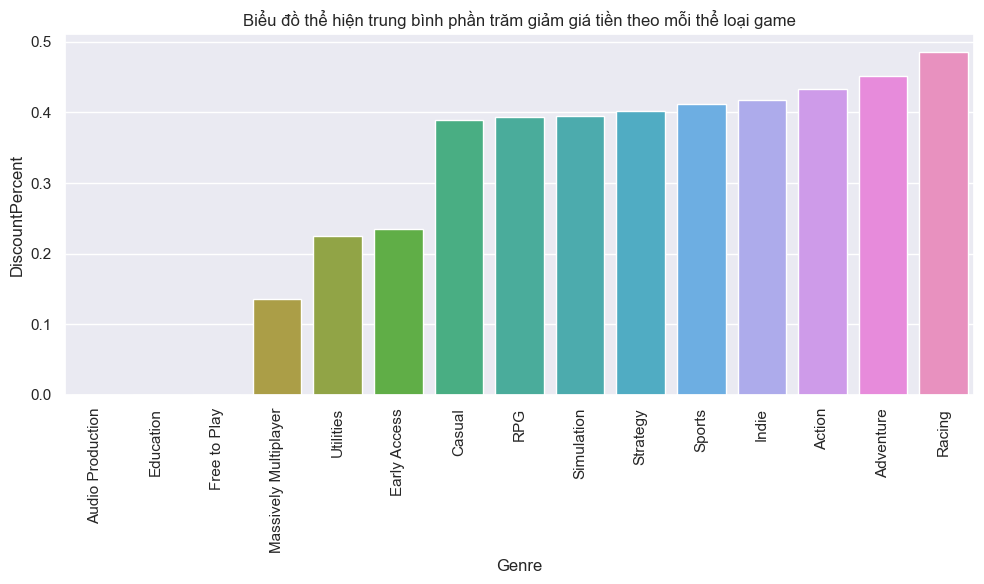

In [17]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(mean_discount_df, x='Genre', y='DiscountPercent', ax=ax)
plt.xticks(rotation=90)
plt.title('Biểu đồ thể hiện trung bình phần trăm giảm giá tiền theo mỗi thể loại game')
plt.tight_layout()

Có vẻ như phần lớn các thể loại game đều có discount trên 30%, chỉ có một số thể loại có discount thấp (Animation & Modeling, Massive Multiplayer,...) chỉ discount dưới 20%. Tuy nhiên đây thường là những thể loại game mang tính giáo dục hơn là giải trí (chẳn hạn như Video Production, Photo Editing), trong khi đó những thể loại game mang tính giải trí, có sức hút nhiều hơn thì discount vẫn trên 30%. 

Vậy ta có thể kết luận game giảm giá nhiều hay ít không ảnh hưởng gì nhiều đến việc những thể loại game đó có đang hot hay không.

Đây là chỉ là đánh giá mang tính chủ quan. Vì mỗi game có một hoặc rất nhiều thể loại, có discount khác nhau. Do đó xử lí như này sẽ không đánh giá đúng 100%, tuy nhiên nó cũng cho chúng ta 1 góc nhìn chung về những game có thể loại như vậy thường có lượng discount trung bình như thế nào.

### Question 3: Những game được nhiều sự quan tâm đánh giá từ người chơi, có khuyến mãi như thế nào ??
Ở câu hỏi 2, ta đã tìm hiểu mỗi thể loại game giảm giá nhiều hay ít ảnh hưởng như thế nào đến xu hướng phát triển của game đó. Vậy những game có khuyến mãi lớn có được người dùng quan tâm nhiều hay không?

Ta có thể phân vùng đánh giá game như sau:\
**0% - 19%:** Negative\
**20% - 39%:** Mostly Negative\
**40% - 69%:** Mixed\
**70% - 79%:** Mostly Positive\
**80% - 100%:** Positive

Do data cào về khá chênh lệch về số lượng game được làm theo từng năm, nên ta sẽ lấy năm 2022 và 2023 để đối chiếu và so sánh.

In [18]:
discount_2022 = cleaned_df.loc[(cleaned_df['ReleaseYear'] == 2022), ['Rating', 'DiscountPercent']]
discount_2023 = cleaned_df.loc[(cleaned_df['ReleaseYear'] == 2023), ['Rating', 'DiscountPercent']]

def classify_percentage(percentage):
    if percentage >= 0 and percentage < 0.2:
        return 'Negative'
    elif percentage >= 0.2 and percentage < 0.4:
        return 'Mostly Negative'
    elif percentage >= 0.4 and percentage < 0.7:
        return 'Mixed'
    elif percentage >= 0.7 and percentage < 0.8:
        return 'Mostly Positive'
    elif percentage >= 0.8 and percentage <= 1:
        return 'Positive'
    else:
        return 'Invalid'

discount_2023['Conclusion'] = discount_2023['Rating'].apply(classify_percentage)
discount_2022['Conclusion'] = discount_2022['Rating'].apply(classify_percentage)

Ta tính giá trị trung bình của `DiscountPercent` cho năm 2022 và 2023

In [19]:
mean_2022 = discount_2022.groupby(['Conclusion'])['DiscountPercent'].mean()
mean_2022 = mean_2022.to_frame().rename(columns= {'DiscountPercent': 'MeanDiscountPercent'}).reset_index()
mean_2023 = discount_2023.groupby(['Conclusion'])['DiscountPercent'].mean()
mean_2023 = mean_2023.to_frame().rename(columns= {'DiscountPercent': 'MeanDiscountPercent'}).reset_index()

Tạo đồ thị violinplot để so sánh sự phân bố của từng mức `Conclusion`:

e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\lib\site-package

[Text(0.5, 99.24999999999997, 'Rating Conclusion'),
 Text(139.0, 0.5, 'Discount Percent')]

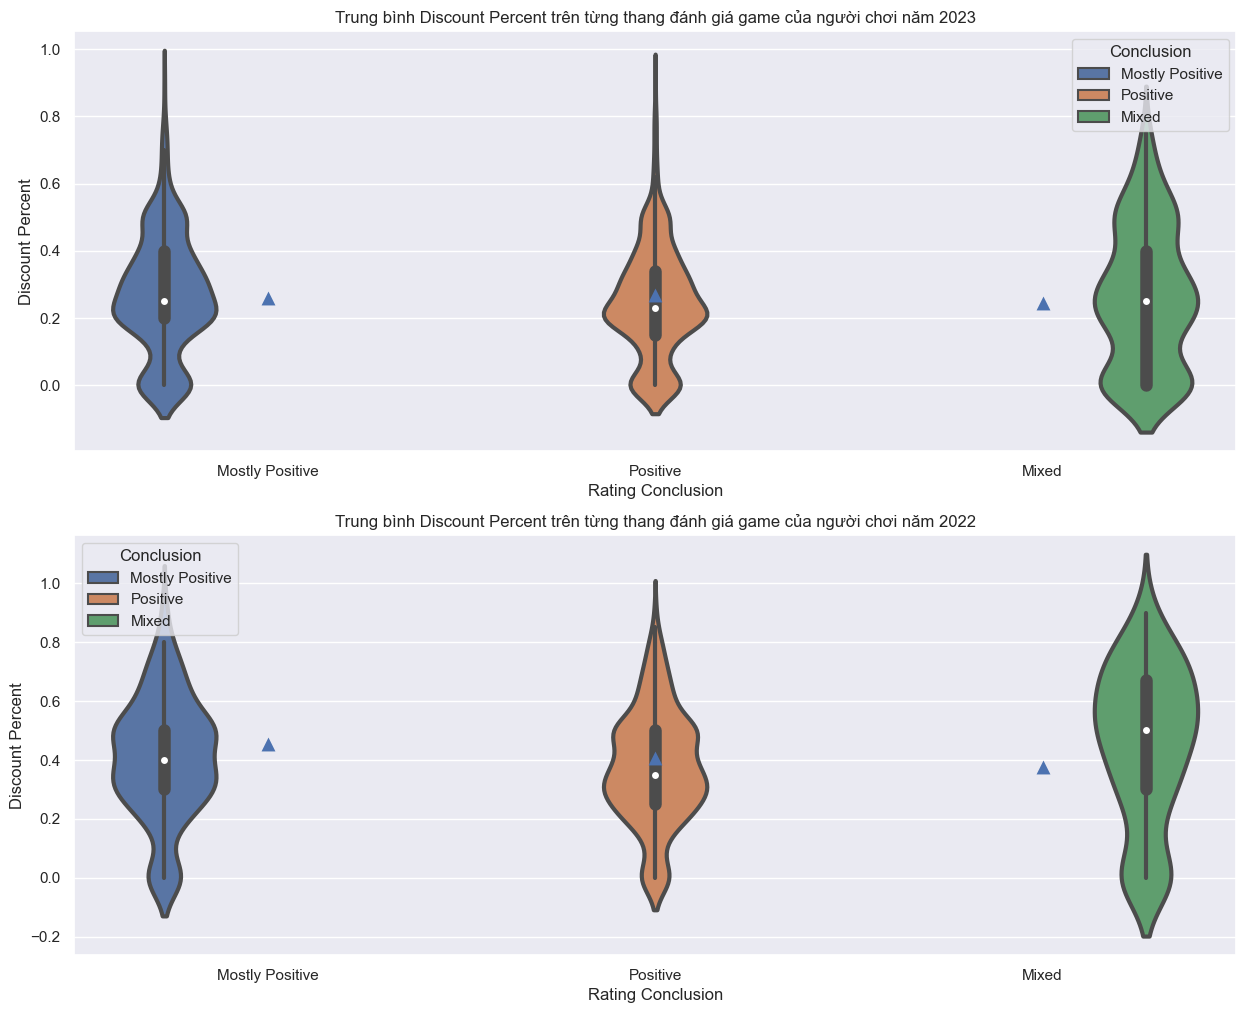

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.swarmplot(data = mean_2023, x = 'Conclusion', y = 'MeanDiscountPercent', ax = axes[0], marker = '^', s = 10, dodge= True)
sns.swarmplot(data = mean_2022, x = 'Conclusion', y = 'MeanDiscountPercent', s = 10,ax = axes[1], marker = '^', dodge= True)

sns.violinplot(data = discount_2023, x = 'Conclusion', y = 'DiscountPercent', hue='Conclusion', linewidth=3, ax=axes[0])
sns.violinplot(data = discount_2022, x = 'Conclusion', y = 'DiscountPercent', hue='Conclusion', linewidth=3, ax=axes[1])
axes[0].set_title('Trung bình Discount Percent trên từng thang đánh giá game của người chơi năm 2023')
axes[1].set_title('Trung bình Discount Percent trên từng thang đánh giá game của người chơi năm 2022')
axes[0].set(xlabel = 'Rating Conclusion', ylabel = 'Discount Percent')
axes[1].set(xlabel = 'Rating Conclusion', ylabel = 'Discount Percent')

Dựa vào biểu đồ, ta thấy sự biến động của các kết luận đánh giá dựa vào DiscountPercent trung bình trong năm 2023 và năm 2022 là có khác nhau đôi chút:
- Với năm 2023, theo mỗi loại đánh giá, lượng người chơi đánh giá nhiều nhất cũng là nơi mà tại đó cũng chính là giá trị trung bình của `DiscountPercent`, và giá trị trung bình nằm ở khoảng xấp xỉ **25%**.
- Trước đó, năm 2022 có giá trị trung bình `DiscountPercent` nằm ở khoảng **40%**, trùng với giá trị median của từng `Conclusion`. Tuy nhiên, số lượng người chơi đánh giá game nhiều nhất không nằm ngay trong khoảng này, mà nó có thể nằm bất kì đâu (như `Mixed` thì nhiều nhất khi `DiscountPercent` khoảng **60%**, `Mostly Positive` là **45%** và `Positive` là khoảng **30%**), số lượng người chơi đánh giá game cũng trải rộng hơn chứ không tập trung vào một số `DiscountPercent` nhất định, và số lượng người chơi đánh giá cũng tăng dần trong khoảng trung bình của nó **(20% - 40%)**.

Vậy với sự khác biệt giữa sự phân bố của từng mức đánh giá trong năm 2023 và 2022 có ý nghĩa gì không?\
**Dự đoán:** nhìn vào biểu đồ, ta có thể giúp thấy thường những vùng mà có chứa `DiscountPercent` trung bình là tập trung nhiều lượng người chơi đánh giá nhất hoặc đó là vùng cũng có một số lượng lớn người chơi đánh giá. Điều này có thể giúp cho các nhà phát triển có thể đưa ra được một chiến lược giảm giá phù hợp để vừa có thể giữ được lợi nhuận cho game và đạt được một số lượng người chơi tốt.

### Question 4: Thể loại game nào được các nhà phát triển ưa chuộng và mang lại Rating cao cho game ???

#### Ta có thể thấy được thể loại game Indie được phát triển, phát hành nhiều nhất trong các thể loại game và dựa vào rating có thể kết luận rằng: Indie là thể loại game khá được người dùng ưa thích. Mặt khác, Photo Editing là thể loại game ít phổ biến ở các game nhưng cũng được đón nhận không kém -> Các nhà làm game và phát hành nên cân nhắc đầu tư cũng như phát triển nhiều hơn thể loại game này

C:\Users\uyenb\AppData\Local\Temp\ipykernel_12892\254545017.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_counts.index, rotation=90)


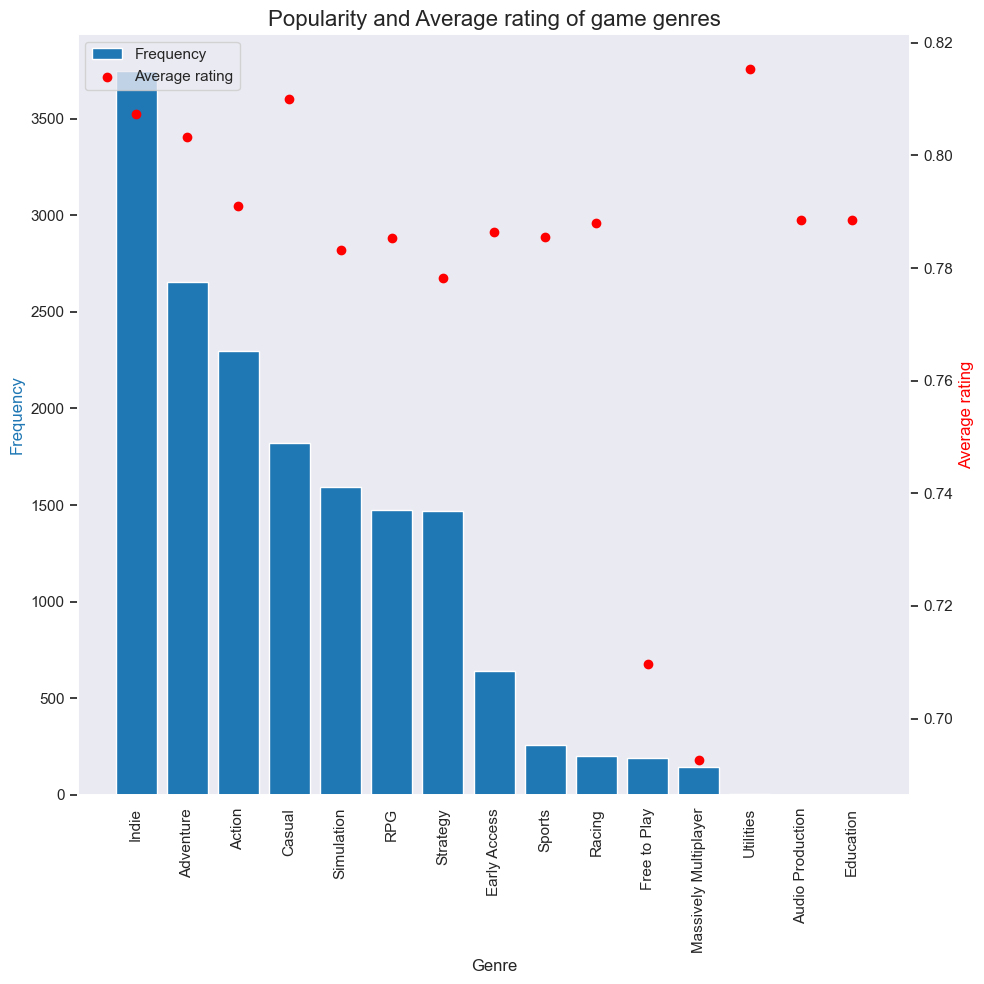

In [21]:
copy_df = cleaned_df.copy()
copy_df['Genre'] = copy_df['Genre'].str.split(', ')
genre_counts = copy_df.explode('Genre')['Genre'].value_counts()
average_ratings_genre = copy_df.explode('Genre').groupby('Genre')['Rating'].mean()

average_ratings_genre = average_ratings_genre.reindex(genre_counts.index)

# bar plot to visualize the popularity of each genre
fig, ax = plt.subplots(figsize = (10, 10))
bars = ax.bar(genre_counts.index, genre_counts.values, color = '#1f77b4')
ax.set_xlabel('Genre')
ax.set_xticklabels(genre_counts.index, rotation=90)
ax.set_ylabel('Frequency', color = '#1f77b4')
ax.grid(False)

ax1 = ax.twinx()
scatters = ax1.scatter(average_ratings_genre.index, average_ratings_genre.values, color = 'red')
ax1.set_ylabel('Average rating', color = 'red')
ax1.grid(False)

plt.title('Popularity and Average rating of game genres', fontsize = 16)
plt.legend([bars, scatters], ['Frequency', 'Average rating'], loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
print(average_ratings_genre)
print(genre_counts)

Genre
Indie                    0.807279
Adventure                0.803245
Action                   0.790948
Casual                   0.810035
Simulation               0.783211
RPG                      0.785314
Strategy                 0.778283
Early Access             0.786400
Sports                   0.785442
Racing                   0.787992
Free to Play             0.709663
Massively Multiplayer    0.692603
Utilities                0.815346
Audio Production         0.788456
Education                0.788456
Name: Rating, dtype: float64
Genre
Indie                    3749
Adventure                2653
Action                   2295
Casual                   1822
Simulation               1593
RPG                      1472
Strategy                 1470
Early Access              642
Sports                    256
Racing                    199
Free to Play              191
Massively Multiplayer     142
Utilities                   2
Audio Production            1
Education                   1

### Câu hỏi 5: Thị trường phát triển game tiềm năng trong những năm gần đây?

Ta sẽ xem xét các ngôn ngữ phát triển trong game qua từng năm và xu hướng phát triển thông qua biểu đồ đường thẳng để đánh giá đâu là thị trường tiềm năng.

Đầu tiên, ta xem xét tất cả các giá trị trong cột `Languages` và phân bố.

In [47]:
# Copy df
df_copy = cleaned_df.copy()

# Split the 'Genre' column into separate genres
df_copy['Languages'] = df_copy['Languages'].str.split(', ')

# Explode the dataframe on the 'Genre' column so each genre has its own row
data_exploded = df_copy.explode('Languages')

In [48]:
data_exploded['Languages'].value_counts()

Languages
English                       5971
Simplified Chinese            2900
Japanese                      2755
German                        2714
French                        2691
                              ... 
Dari                            23
Amharic                         23
Wolof                           23
#lang_english (full audio)       1
#lang_german;                    1
Name: count, Length: 105, dtype: int64

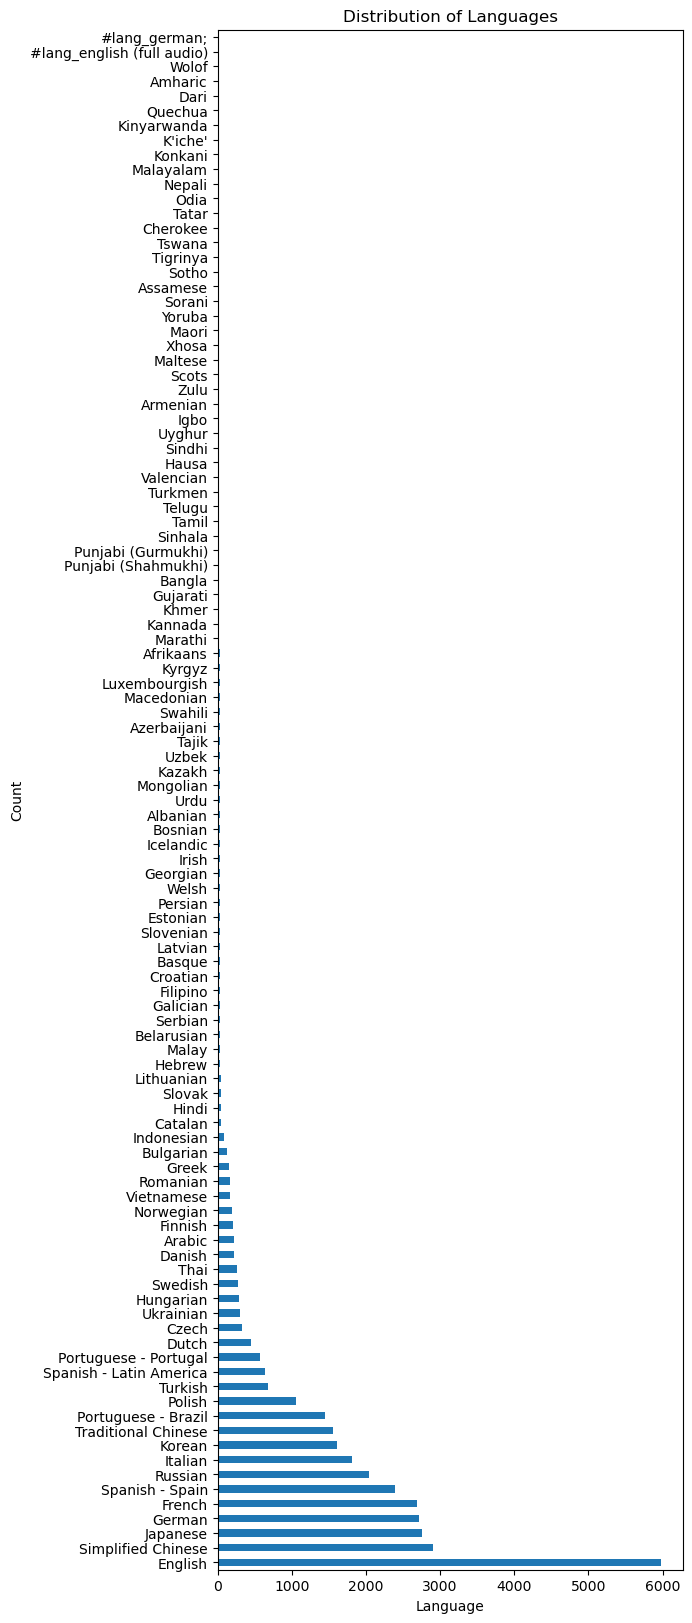

In [54]:
# Plot the distribution of languages
plt.figure(figsize=(6, 20))
data_exploded['Languages'].value_counts().plot(kind='barh')
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

Ta thấy rằng có rất nhiều ngôn ngữ được hỗ trợ, tuy nhiên phần lớn là các ngôn ngữ chỉ xuất hiện trong một vài game. Nên ta chỉ lấy **top 10** ngôn ngữ xuất hiện nhiều nhất để phân tích.

In [55]:
# top 10 ngôn ngữ và số lần xuất hiện trong các games
top_10_lang = data_exploded['Languages'].value_counts().nlargest(10)
top_10_lang

# DataFrame
top_10_lang_df = data_exploded[data_exploded['Languages'].isin(top_10_lang.index)]
top_10_lang_df

,Title,Genre,withDLC,isMature,Developer,Publisher,Languages,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
0,HumanitZ,"Action, Adventure, RPG, Early Access",0.0,0.0,Yodubzz Studios,Freedom Games,English,1581.0,2081.0,500.0,260000.0,0.2,208000.0,2023,9,18,0.733696
0,HumanitZ,"Action, Adventure, RPG, Early Access",0.0,0.0,Yodubzz Studios,Freedom Games,French,1581.0,2081.0,500.0,260000.0,0.2,208000.0,2023,9,18,0.733696
0,HumanitZ,"Action, Adventure, RPG, Early Access",0.0,0.0,Yodubzz Studios,Freedom Games,German,1581.0,2081.0,500.0,260000.0,0.2,208000.0,2023,9,18,0.733696
0,HumanitZ,"Action, Adventure, RPG, Early Access",0.0,0.0,Yodubzz Studios,Freedom Games,Spanish - Spain,1581.0,2081.0,500.0,260000.0,0.2,208000.0,2023,9,18,0.733696
0,HumanitZ,"Action, Adventure, RPG, Early Access",0.0,0.0,Yodubzz Studios,Freedom Games,Japanese,1581.0,2081.0,500.0,260000.0,0.2,208000.0,2023,9,18,0.733696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,Khimera: Puzzle Island,"Adventure, Casual, Indie",1.0,0.0,Suits & Sandals,Suits & Sandals,English,184.0,190.0,6.0,73500.0,0.9,7350.0,2020,11,29,0.872043
5967,Khimera: Puzzle Island,"Adventure, Casual, Indie",1.0,0.0,Suits & Sandals,Suits & Sandals,Japanese,184.0,190.0,6.0,73500.0,0.9,7350.0,2020,11,29,0.872043
5968,HeXen II,Action,0.0,0.0,Raven Software,id Software,English,372.0,453.0,81.0,112500.0,0.7,33750.0,1998,3,27,0.770269
5969,Time Commando,Action,0.0,0.0,[2.21],[2.21],English,57.0,61.0,4.0,87500.0,0.0,87500.0,1996,7,31,0.809010


Tạo DataFrame `lang_df` lưu các ngôn ngữ và số lượng game có hỗ trợ ngôn ngữ đó từ năm 2013 đến nay.

In [63]:
# Filter the data to include only games released from 2013 onwards
top_10_lang_df = top_10_lang_df[top_10_lang_df['ReleaseYear'] >= 2017]

# Create lang_df which stores each language and the number of games that support that language for each year
lang_df = top_10_lang_df.groupby(['ReleaseYear', 'Languages']).size().reset_index(name='Number of Games')

lang_df

,ReleaseYear,Languages,Number of Games
0,2017,English,292
1,2017,French,123
2,2017,German,126
3,2017,Italian,92
4,2017,Japanese,132
...,...,...,...
65,2023,Korean,490
66,2023,Russian,506
67,2023,Simplified Chinese,939
68,2023,Spanish - Spain,608


Vẽ biểu đồ thể hiện xu hướng và kết luận

In [66]:
# Pivot the DataFrame to have years as columns, languages as index, and number of games as values
pivot_df = lang_df.pivot(index='Languages', columns='ReleaseYear', values='Number of Games').fillna(0)

# Reset the index
pivot_df.reset_index(inplace=True)

# Melt the DataFrame to have one row per year-language combination
melted_df = pivot_df.melt(id_vars='Languages', var_name='Year', value_name='Number of Games')

# Plot a line chart for each language using Plotly
fig = px.line(melted_df, x='Year', y='Number of Games', color='Languages', title='Xu hướng phát triển thị trường game qua các năm')
fig.show()

**Nhận xét:**